# EDA & Modeling

In [1]:
random_state = 42

## Package loading

In [2]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


## Project name

In [3]:
name = 'cancer'

# Exploratory Data Analysis 

## Thresholds & other parameters

In [4]:
problem_type = 'classification'

In [5]:
data_size = 'small'

In [6]:
threshold_NaN = 0.5

In [7]:
threshold_cat = 10

In [8]:
threshold_Z = 3.0

In [9]:
test_size = 0.33

In [10]:
threshold_entropy = 0.75

In [11]:
undersampling = False

In [12]:
undersampler = 'Random'

In [13]:
threshold_corr = 1.0

In [14]:
threshold_model = 5

In [15]:
threshold_score = 0.7

In [16]:
threshold_feature = 5

In [17]:
with_keras = False

In [18]:
CPU = False

In [19]:
time_dep = False

In [20]:
date_idx = 0

In [21]:
lag_number = 3

In [22]:
level_1_model = 'regression'

## File & target

In [23]:
path = '/home/fifi/Documents/ezstacking/dataset/cancer patient data sets.csv'

In [24]:
df = pd.read_csv(path)

In [25]:
target_col = 'Level'

### Deployment

In [26]:
FastAPI_port = 8000

In [27]:
Docker_port = 80

# Drop user's columns & Duplicates:

In [28]:
user_drop_cols = ['index', 'Patient_Id']

Dataset before deletion

In [29]:
display(df)

index Patient_Id  Age  Gender  Air_Pollution  Alcohol_use  Dust_Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational_Hazards  Genetic_Risk  chronic_Lung_Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight_Loss  Shortness_of_Breath  Wheezing  Swallowing_Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing_of_Finger_Nails  Frequent_Cold  Dry_Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

In [30]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [31]:
df = duplicates(df)

Number of rows before removing: 1000
Number of duplicate rows: 848
Number of rows after removing: 152


Dataset after deletion of user’s columns and duplicates

In [32]:
display(df)

Age  Gender  Air_Pollution  Alcohol_use  Dust_Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
497   35       1              2            1             2   
977   45       1              3            1             4   
979   53       1              3            1             4   
983   26       1              3            2             4   
984   37       1              1            2             3   

     OccuPational_Hazards  Genetic_Risk  chronic_Lung_Disease  Balanced_Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
497                     1             2                     1              2   
977                     3             2                     3              4   
979                     2             3                     2              3   
983                     2             3                     2              3   
984                     4             2                     4              3   

     Obesity  ...  Fatigue  Weight_Loss  Shortness_of_Breath  Wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
497        3  ...        3            4                    5         1   
977        3  ...        3            2                    2         4   
979        3  ...        2            2                    3         4   
983        3  ...        4            5                    6         5   
984        3  ...        4            1                    2         4   

     Swallowing_Difficulty  Clubbing_of_Finger_Nails  Frequent_Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
497                      3                         2              1   
977                      2                         2              3   
979                      1                         5              2   
983                      5                         4              6   
984                      6                         5              4   

     Dry_Cough  Snoring   Level  
0            3        4     Low  
1            7        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
497          2        2     Low  
977          4        3     Low  
979          6        2     Low  
983          5        4  Medium  
984          2        5  Medium  

[152 rows x 24 columns]

### Dataset copy

In [33]:
df_copy = df.copy()

# Dataset Information

### Dataframe structure

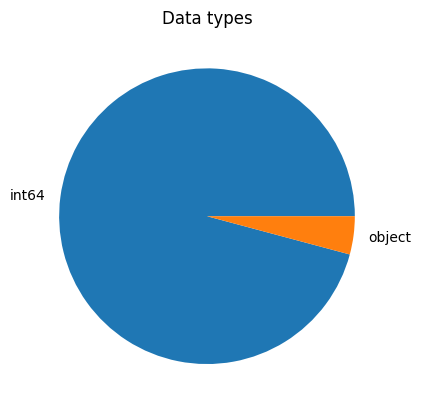

In [34]:
plot_dataframe_structure(df)

### Dataframe statistics

In [35]:
display(df.describe().T)

count       mean        std   min    25%   50%  \
Age                       152.0  38.236842  11.798382  14.0  28.00  37.0   
Gender                    152.0   1.414474   0.494259   1.0   1.00   1.0   
Air_Pollution             152.0   3.717105   1.978084   1.0   2.00   3.0   
Alcohol_use               152.0   4.480263   2.601503   1.0   2.00   5.0   
Dust_Allergy              152.0   5.046053   2.027424   1.0   3.75   6.0   
OccuPational_Hazards      152.0   4.710526   2.158095   1.0   3.00   5.0   
Genetic_Risk              152.0   4.486842   2.143794   1.0   2.00   5.0   
chronic_Lung_Disease      152.0   4.243421   1.880527   1.0   3.00   4.0   
Balanced_Diet             152.0   4.427632   2.151857   1.0   2.00   4.0   
Obesity                   152.0   4.414474   2.120365   1.0   3.00   4.0   
Smoking                   152.0   3.973684   2.473562   1.0   2.00   3.0   
Passive_Smoker            152.0   4.151316   2.263327   1.0   2.00   4.0   
Chest_Pain                152.0   4.388158   2.278751   1.0   2.00   4.0   
Coughing_of_Blood         152.0   4.796053   2.453107   1.0   3.00   4.0   
Fatigue                   152.0   3.763158   2.230840   1.0   2.00   3.0   
Weight_Loss               152.0   3.828947   2.233924   1.0   2.00   3.0   
Shortness_of_Breath       152.0   4.269737   2.263943   1.0   2.00   4.0   
Wheezing                  152.0   3.776316   2.036740   1.0   2.00   4.0   
Swallowing_Difficulty     152.0   3.750000   2.196475   1.0   2.00   4.0   
Clubbing_of_Finger_Nails  152.0   3.894737   2.344948   1.0   2.00   4.0   
Frequent_Cold             152.0   3.480263   1.848466   1.0   2.00   3.0   
Dry_Cough                 152.0   3.684211   2.047195   1.0   2.00   3.0   
Snoring                   152.0   2.921053   1.542022   1.0   2.00   3.0   

                           75%   max  
Age                       46.0  73.0  
Gender                     2.0   2.0  
Air_Pollution              6.0   8.0  
Alcohol_use                7.0   8.0  
Dust_Allergy               7.0   8.0  
OccuPational_Hazards       7.0   8.0  
Genetic_Risk               7.0   7.0  
chronic_Lung_Disease       6.0   7.0  
Balanced_Diet              7.0   7.0  
Obesity                    7.0   7.0  
Smoking                    7.0   8.0  
Passive_Smoker             7.0   8.0  
Chest_Pain                 7.0   9.0  
Coughing_of_Blood          7.0   9.0  
Fatigue                    5.0   9.0  
Weight_Loss                6.0   8.0  
Shortness_of_Breath        6.0   9.0  
Wheezing                   5.0   8.0  
Swallowing_Difficulty      5.0   8.0  
Clubbing_of_Finger_Nails   5.0   9.0  
Frequent_Cold              5.0   7.0  
Dry_Cough                  5.0   7.0  
Snoring                    4.0   7.0

### Which columns could be categorical ?

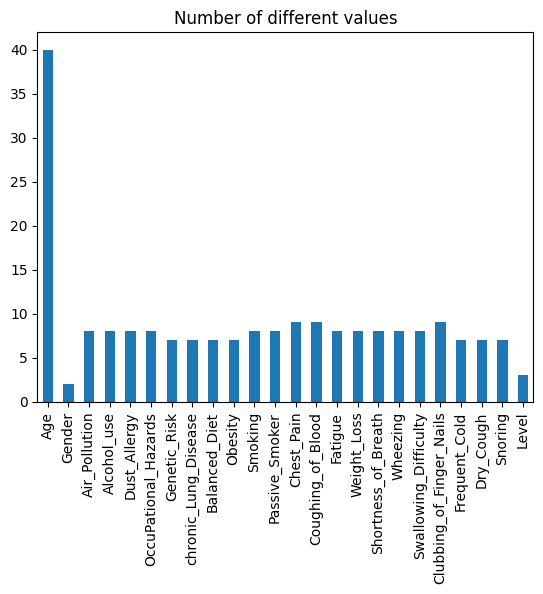

In [36]:
plot_categorical(df)

# Dataset Cleaning

### Drop NaN:

In [37]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [38]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [39]:
display(dropped_cols)

array(['Patient_Id', 'index'], dtype='<U32')

### Encoding data:

In [40]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Age
Column  Gender  is categorical.
Column  Air_Pollution  is categorical.
Column  Alcohol_use  is categorical.
Column  Dust_Allergy  is categorical.
Column  OccuPational_Hazards  is categorical.
Column  Genetic_Risk  is categorical.
Column  chronic_Lung_Disease  is categorical.
Column  Balanced_Diet  is categorical.
Column  Obesity  is categorical.
Column  Smoking  is categorical.
Column  Passive_Smoker  is categorical.
Column  Chest_Pain  is categorical.
Column  Coughing_of_Blood  is categorical.
Column  Fatigue  is categorical.
Column  Weight_Loss  is categorical.
Column  Shortness_of_Breath  is categorical.
Column  Wheezing  is categorical.
Column  Swallowing_Difficulty  is categorical.
Column  Clubbing_of_Finger_Nails  is categorical.
Column  Frequent_Cold  is categorical.
Column  Dry_Cough  is categorical.
Column  Snoring  is categorical.
Encoding object column: Level


### Imputing NaN using IterativeImputer

#### Imputation

In [41]:
df = imputation(df)

No need to impute data.


### Data compression:

In [42]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.03MB
Memory usage after optimization is: 0.00MB
Decreased by 83.2%


#### Dataframe structure after compression

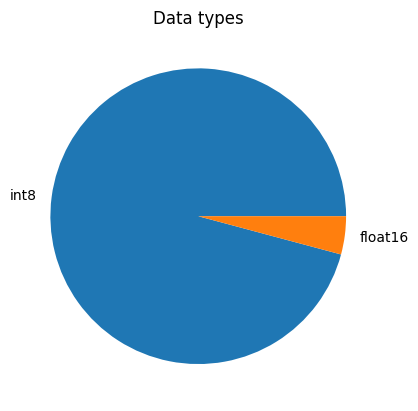

In [43]:
plot_dataframe_structure(df)

### Outliers:

In [44]:
df = outliers(df, threshold_Z)

Using Z_score,  0  rows will be suppressed.


# Correlation according to Pearson

In [45]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [46]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

### Check columns that should be dropped

In [47]:
print(dropped_cols)

[]


# Correlation according to Spearman (hierarchical clustering)

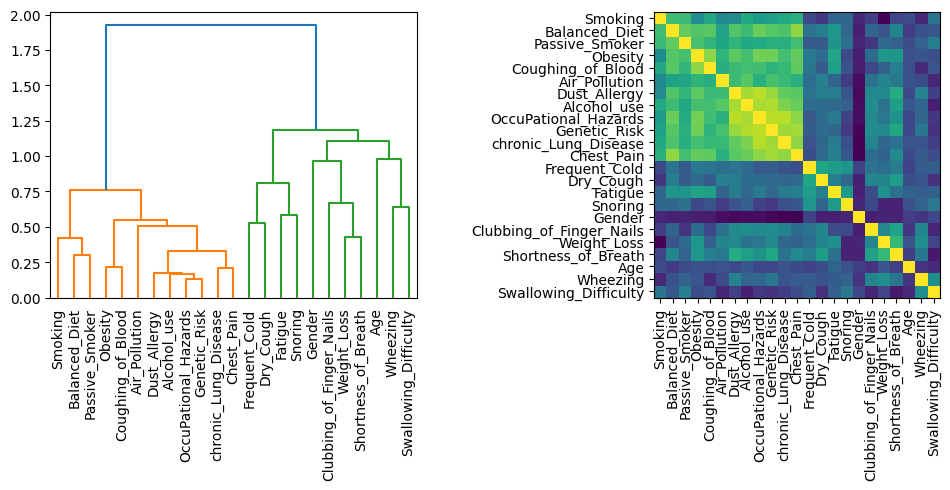

In [48]:
hierarchical_clustering(df.drop(target_col, axis=1))

# Class balancing

In [49]:
print('Entropy = ', shannon_entropy(df[target_col]))

Entropy =  0.998764525268568


# Splittings 

In [50]:
df = df_copy

## Splitting dataframe in features and targets

In [51]:
y = df[target_col]

In [52]:
X = df.drop(target_col, axis=1)

## Dimensions

In [53]:
nb_features = len(X.columns.tolist())

In [54]:
nb_targets = len(y.unique())

In [55]:
layer_size = nb_features + nb_targets + 2

## Splitting data in train and test sets 

In [56]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling=undersampling, undersampler=undersampler, random_state=random_state)

## Encoding

In [57]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

# Modeling

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [58]:
cat_selector = make_column_selector(dtype_include=object)

In [59]:
num_selector = make_column_selector(dtype_include=np.number)

#### For models based on tree

In [60]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [61]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [62]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

#### For models not based on tree

In [63]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [64]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [65]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

#### Level-0 models

In [66]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTCG', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='gini', random_state = random_state))), 
          ('DTCE', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='entropy', random_state = random_state))), 
          ('RFCG', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=100, random_state = random_state))), 
          ('RFCE', make_pipeline(tree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=100, random_state = random_state))), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True, random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('SVCL', make_pipeline(ntree_preprocessor, SVC(kernel='linear', random_state = random_state))), 
          ('SVCP', make_pipeline(ntree_preprocessor, SVC(kernel='poly', random_state = random_state))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf', random_state = random_state))), 
          ('SVCS', make_pipeline(ntree_preprocessor, SVC(kernel='sigmoid', random_state = random_state))), 
          ]

#### Level-1 model

In [67]:
level_1 = LogisticRegression(random_state = random_state)

#### Stacking for classification

In [68]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

# Model fitting

In [69]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anacon

CPU times: user 751 ms, sys: 242 ms, total: 993 ms
Wall time: 18.5 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler())]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f62345f58d0>),
                                                                                 ('pipeline-2',
                                                                                  Pipe...
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f62345b1a50>)])),
                                                ('svc',
                                                 SVC(kernel='sigmoid',
                                                     random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Model evaluation

### Model scoring

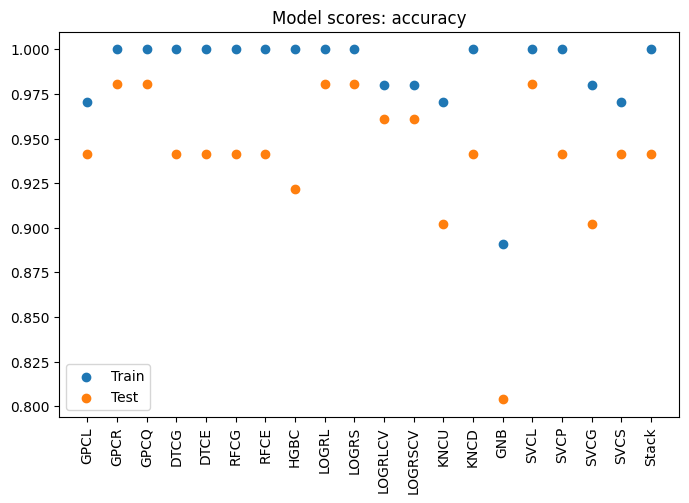

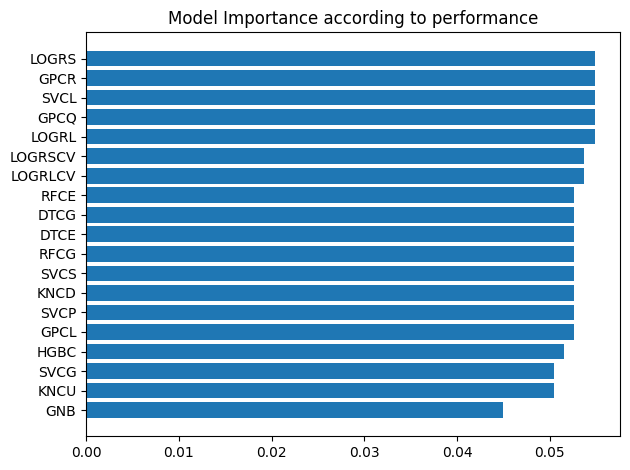

In [70]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### Classification report

In [71]:
K_classification_report(model, X_train, y_train, X_test, y_test)

### Confusion matrix

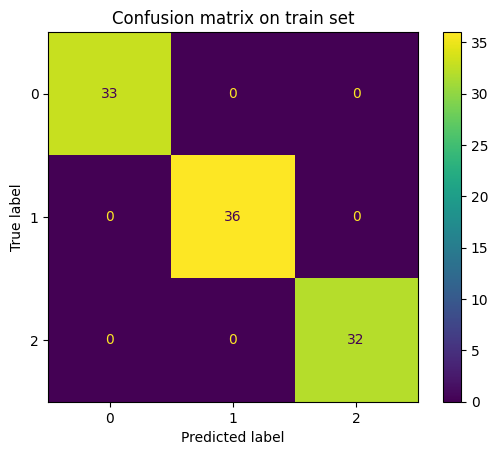

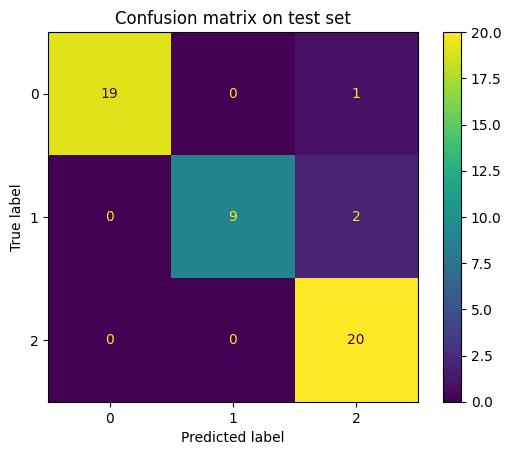

In [72]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

# Model inspection

### Model importance

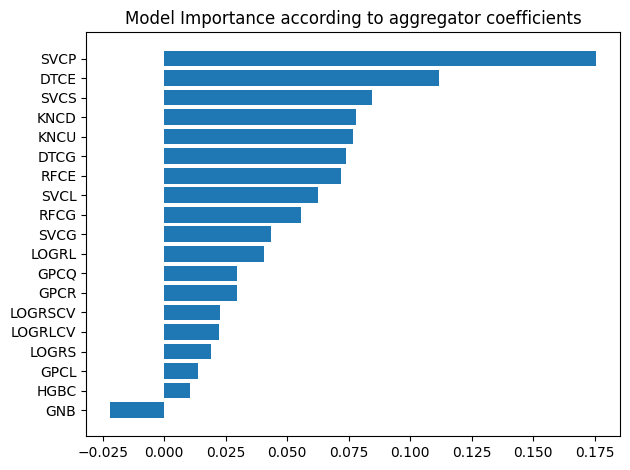

In [73]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

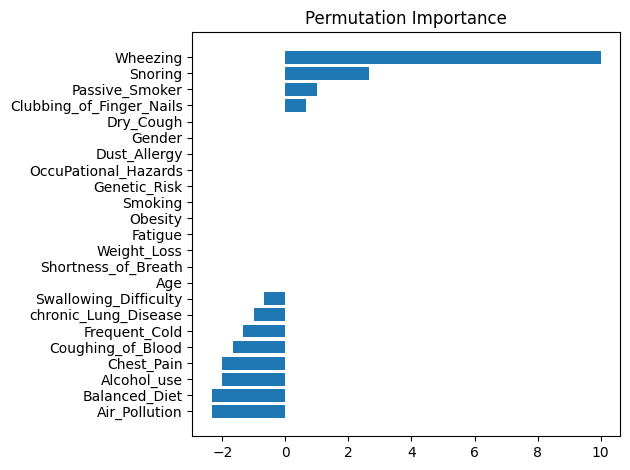

In [74]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Level-0 model elimination

#### Filtered Level-0 models

In [75]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Level-1 model with filtration

In [76]:
level_1 = LogisticRegression(random_state = random_state)

#### Build filtered model

In [77]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

# Filtered Model fitting

In [78]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 99.6 ms, sys: 7.98 ms, total: 108 ms
Wall time: 1.68 s


StackingClassifier(estimators=[('DTCE',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f62345f58d0>),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleI...
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f62345b1a50>)])),
                                                ('svc',
                                                 SVC(kernel='sigmoid',
                                                     random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Filtered Model evaluation

### Filtered Model scoring

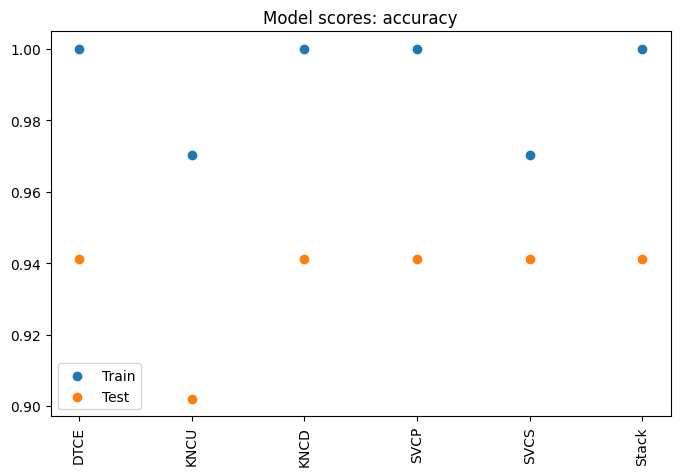

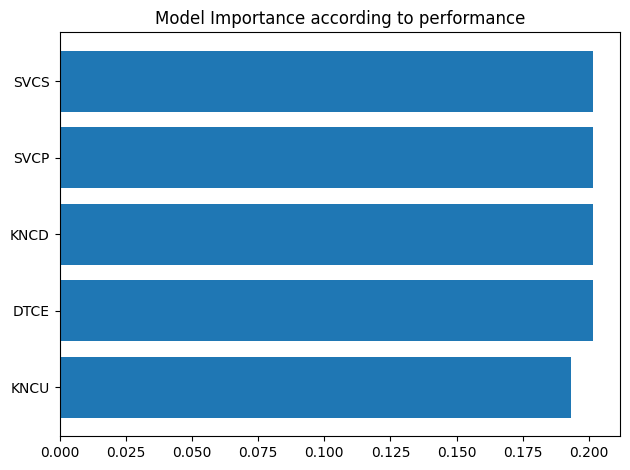

In [79]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered Confusion matrix

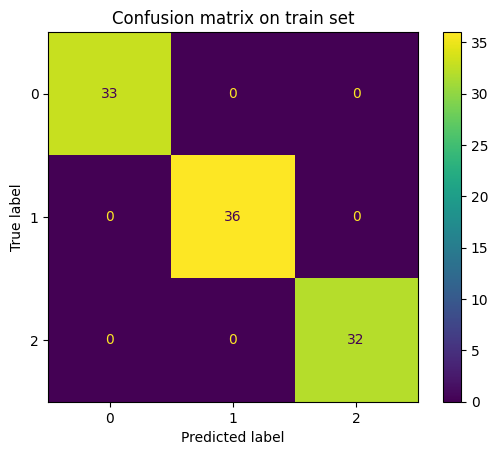

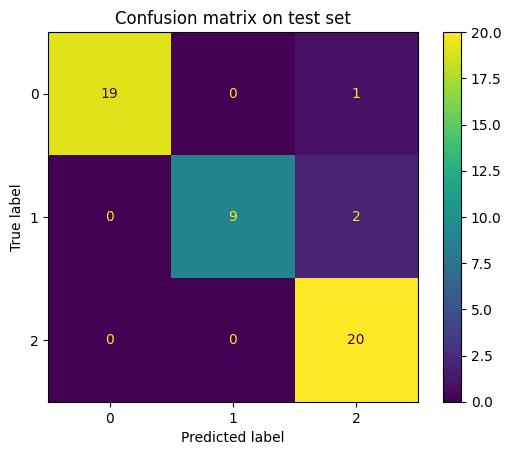

In [80]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

# Filtered Model inspection

### Filtered Model importance

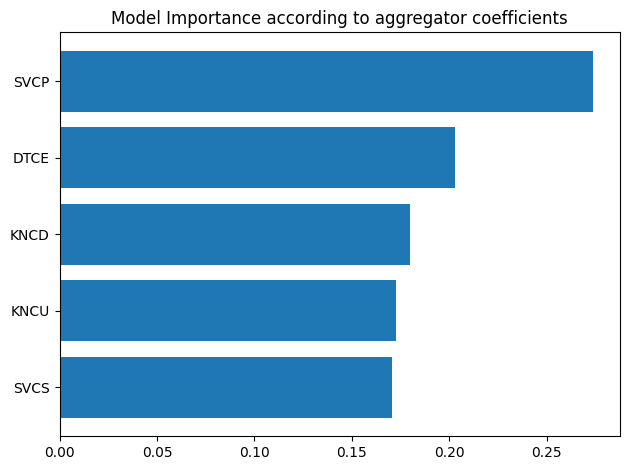

In [81]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

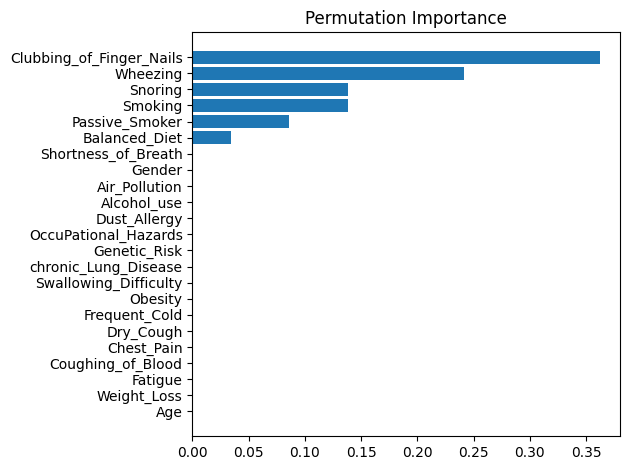

In [82]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [83]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [84]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

### Check those columns, they should be dropped

In [85]:
print(dropped_cols)

['Age', 'Air_Pollution', 'Alcohol_use', 'Balanced_Diet', 'Chest_Pain', 'Coughing_of_Blood', 'Dry_Cough', 'Dust_Allergy', 'Fatigue', 'Frequent_Cold', 'Gender', 'Genetic_Risk', 'Obesity', 'OccuPational_Hazards', 'Shortness_of_Breath', 'Swallowing_Difficulty', 'Weight_Loss', 'chronic_Lung_Disease']


# Final Model

In [86]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [87]:
reduce_schema('column_name', dropped_cols)

# Splitting

In [88]:
y = df[target_col] 

In [89]:
X = df.drop(target_col, axis=1) 

## Dimensions

In [90]:
nb_features = len(X.columns.tolist()) 

In [91]:
nb_targets = len(y.unique()) 

In [92]:
layer_size = nb_features + nb_targets + 2 

## Splitting data in train and test sets 

In [93]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

## Encoding

In [94]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test)) 

In [95]:
threshold_score = 0.7

#### Build final model

In [96]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

# Final Model fitting

In [97]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 105 ms, sys: 0 ns, total: 105 ms
Wall time: 539 ms


StackingClassifier(estimators=[('DTCE',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('iterativeimputer',
                                                                                                   IterativeImputer(add_indicator=True,
                                                                                                                    random_state=42))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f62345f58d0>),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleI...
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse_output=False))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f62345b1a50>)])),
                                                ('svc',
                                                 SVC(kernel='sigmoid',
                                                     random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Final Model evaluation

### Final Model scoring

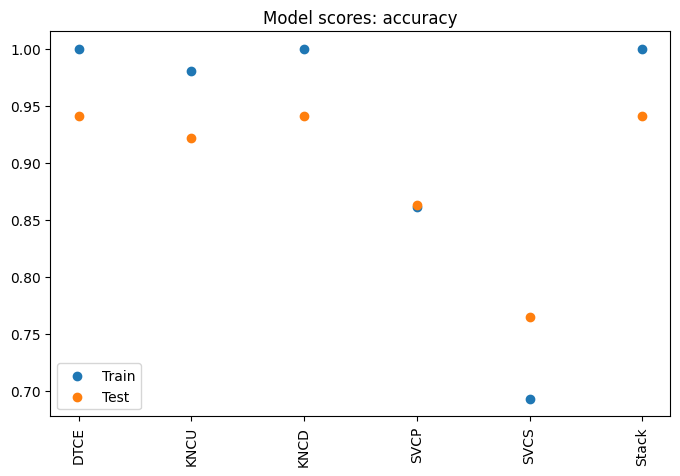

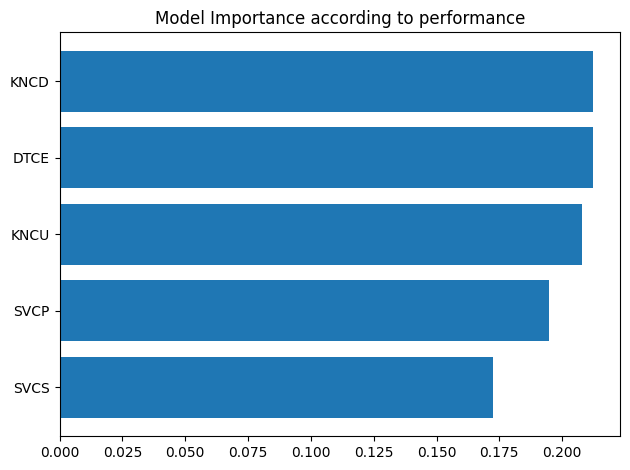

In [98]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

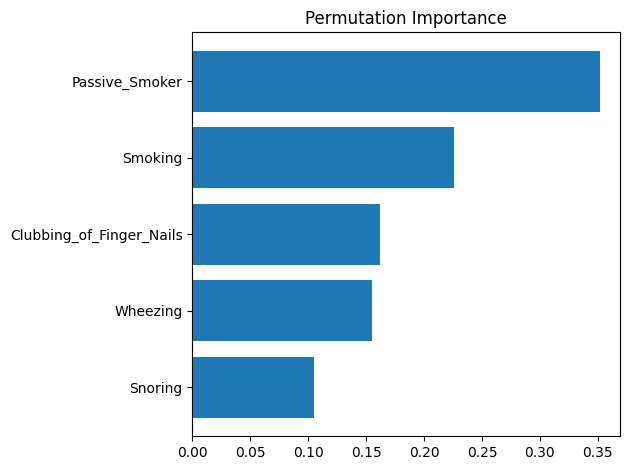

In [99]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

#### Final feature elimination

In [100]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final Classification report

In [101]:
K_classification_report(model, X_train, y_train, X_test, y_test)

### Final Confusion matrix

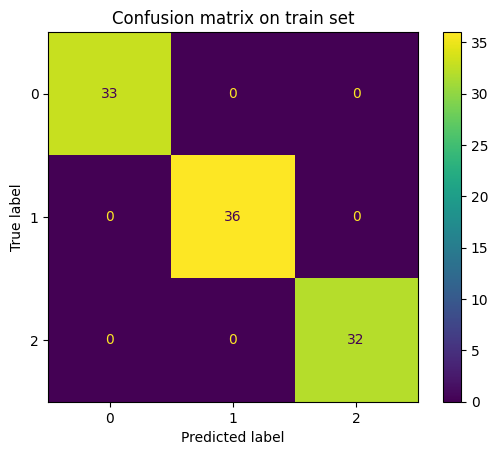

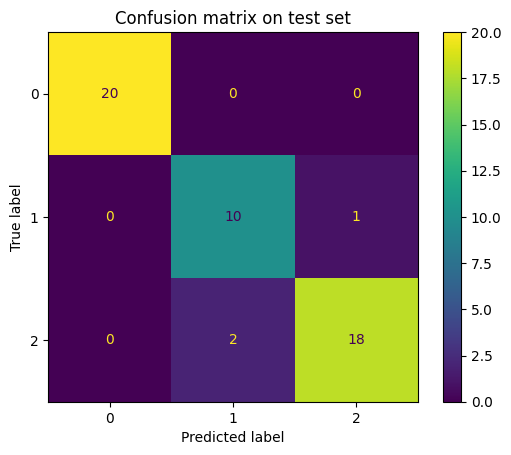

In [102]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

# Final Model inspection

### Final Model importance

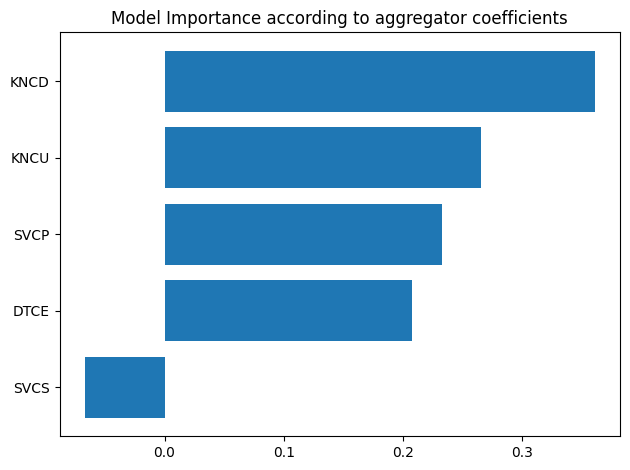

In [103]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

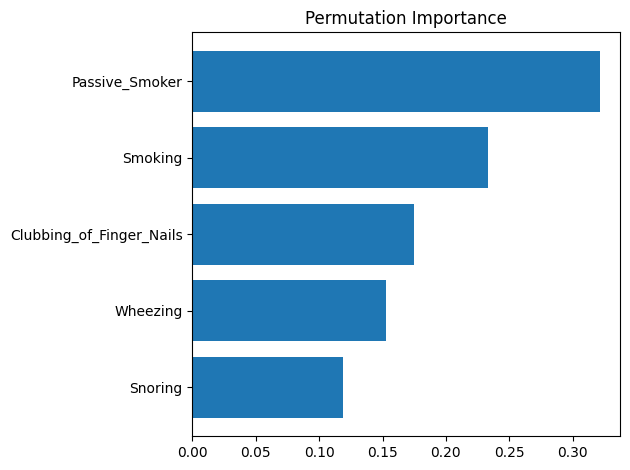

array([['Snoring', 0.1184738955823293],
       ['Wheezing', 0.15261044176706828],
       ['Clubbing_of_Finger_Nails', 0.17469879518072287],
       ['Smoking', 0.23293172690763053],
       ['Passive_Smoker', 0.321285140562249]], dtype=object)

In [104]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [106]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU, target_encoder=target_encoder)

interactive(children=(Dropdown(description='feature', options=('Smoking', 'Passive_Smoker', 'Wheezing', 'Clubb…

# Deployment

## Save your model

In [107]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

## Generate your server

In [108]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port, with_keras)

## [Test your API](./server.ipynb)

## Docker

In [109]:
dockerize(name, model, model_name, X, y, Docker_port, with_keras)